
This notebook uses the output of the rule
--- 75_assm_stats.smk::aggregate_contig_sequence_class_coverage
as input, and produces a panel for figure 1.

Execution directory:  /home/local/work/code/github/project-male-assembly/notebooks/plotting/assm_stats
Working directory:  /home/local/work/data/sig_chrY/paper
Output directory:  /home/local/work/data/sig_chrY/paper/output/figures
PAR1             22.7
XDR1            100.0
XTR1             95.5
AMPL1            97.7
XTR2            100.0
XDR2             97.7
AMPL2            81.8
other1          100.0
HET1_centro      50.0
XDR3             97.7
AMPL3           100.0
XDR4            100.0
AMPL4           100.0
XDR5            100.0
AMPL5            95.5
XDR6            100.0
AMPL6            68.2
XDR7            100.0
HET2_DYZ19      100.0
XDR8            100.0
AMPL7            54.5
other2_DYZ18     97.7
HET3_Yq          13.6
PAR2             88.6
dtype: float64


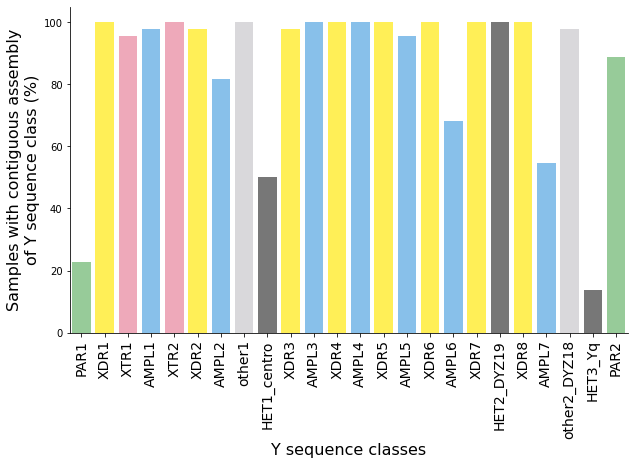

In [1]:
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib as mpl
import matplotlib.pyplot as plt

desc="""
This notebook uses the output of the rule
--- 75_assm_stats.smk::aggregate_contig_sequence_class_coverage
as input, and produces a panel for figure 1.
"""

print(desc)

repo_dir = pl.Path('/home/local/work/code/github/project-male-assembly').resolve(strict=True)
exec_dir = pl.Path('.').resolve(strict=True)
wd_dir = pl.Path('/home/local/work/data/sig_chrY/paper')
out_dir = pl.Path('/home/local/work/data/sig_chrY/paper/output/figures').resolve(strict=True)

print('Execution directory: ', exec_dir)
print('Working directory: ', wd_dir)
print('Output directory: ', out_dir)
print('=================================')

t2t_classes = wd_dir / pl.Path('annotation_tables', 'T2T.chrY-seq-classes.tsv')
t2t = pd.read_csv(t2t_classes, sep='\t', header=0)

assm_contiguity_file = wd_dir / pl.Path('stats', 'ctg_cov', 'contig-ctg.HIFIRW.ONTUL.na.chrY.tsv')

assm_ctg = pd.read_csv(assm_contiguity_file, sep='\t', header=0)
assm_ctg.drop('contig', axis=1, inplace=True)

new_index = [] 
new_rows = []
for sample, contiguity in assm_ctg.groupby('sample'):
    if contiguity.shape[0] == 1:
        new_index.append(sample)
        indicator = contiguity.values[0][1:]
        new_rows.append(indicator.astype(int))
    else:
        indicator = (contiguity.loc[:, contiguity.columns[1:]] > 0).any(axis=0).values
        new_index.append(sample)
        new_rows.append(indicator.astype(int))

merged_data = pd.DataFrame(
    new_rows,
    columns=assm_ctg.columns[1:],
    index=new_index,
    dtype=int
)

pct_contig_assm = (merged_data.sum(axis=0) / merged_data.shape[0] * 100).round(1)
print(pct_contig_assm)

fig, ax = plt.subplots(figsize=(10,6))
fig_name = 'samples_w_contig_assm_seq_class'

ax.bar(
    np.arange(1, pct_contig_assm.shape[0]+1),
    height=pct_contig_assm,
    color=[(row.red,row.green,row.blue) for row in t2t.itertuples()]
)
ax.set_xlim(0.5, 24.5)
ax.set_ylabel(
    'Samples with contiguous assembly\nof Y sequence class (%)',
    fontsize=16
)
ax.set_xlabel(
    'Y sequence classes',
    fontsize=16
)
ax.set_xticks(np.arange(1, pct_contig_assm.shape[0]+1))
ax.set_xticklabels(
    [row.name for row in t2t.itertuples()],
    fontsize=14,
    rotation=90
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(
    out_dir / pl.Path(f'{fig_name}.png'),
    dpi=150, bbox_inches='tight', transparent=False
)

plt.savefig(
    out_dir / pl.Path(f'{fig_name}.pdf'),
    bbox_inches='tight', transparent=False
)